# Connect to Google Drive

In [ ]:
# download the Diabetics dataset at: https://www.kaggle.com/datasets/kandij/diabetes-dataset/data
# Use Google Drive as Data Storage
from google.colab import drive
drive.mount('/content/gdrive')

!ls -l ./gdrive/MyDrive/Colab\ Notebooks/datasets

Mounted at /content/gdrive
total 24
-rw------- 1 root root 23875 Oct 17 04:57 diabetes2.csv


# Load Data

In [ ]:
import pandas as pd

# load data from "diabetes2.csv" file located on google drive
rawdata = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/diabetes2.csv')

In [ ]:
# display the top rows
rawdata.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# get a quick description of the data, including # of rows, # of features, name of each feature, type of each feature, # of non-null values
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# show a summary of the numerical attributes
rawdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data = rawdata.drop("Outcome", axis=1, inplace=False).astype(float)

target = rawdata["Outcome"].copy()

# Printing the shape of the 'data' and 'target' variables, which shows the number of rows and columns.
print(data.shape)
print(target.shape)

# Printing information about the 'data' DataFrame.
data.info()

# Printing information about the 'target' Series.
target.info()

(768, 8)
(768,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
dtypes: float64(8)
memory usage: 48.1 KB
<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Create a numeric data preprocessing pipeline.
num_pipeline = Pipeline([
    ('std_scalar', StandardScaler()),
])

# Apply the numeric data preprocessing pipeline to 'data' and store the result in 'data_preprocessed'.
data_preprocessed = num_pipeline.fit_transform(data)
target_preprocessed = target.values

# Split the data into training, validation, and test sets using train_test_split.
train_data, valid_data, train_target, valid_target, = train_test_split(data_preprocessed, target_preprocessed, test_size=0.2, random_state=42)
train_data, test_data, train_target, test_target = train_test_split(train_data, train_target, test_size=0.25, random_state=42)

# Print the shapes of the different datasets for validation.
print('train_data.shape: ', train_data.shape)
print('train_target.shape: ', train_target.shape)
print()

print('valid_data.shape: ', valid_data.shape)
print('valid_target.shape: ', valid_target.shape)
print()

print('test_data.shape: ', test_data.shape)
print('test_target.shape: ', test_target.shape)
print()


train_data.shape:  (460, 8)
train_target.shape:  (460,)

valid_data.shape:  (154, 8)
valid_target.shape:  (154,)

test_data.shape:  (154, 8)
test_target.shape:  (154,)



In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model.
lr = LogisticRegression()

# Fit the model on the training data and target.
lr.fit(train_data, train_target)

# Print the coefficients and intercepts of the logistic regression model.
print('Coefficients: \n', lr.coef_)
print('Intercepts: \n', lr.intercept_)
print()

from sklearn.metrics import log_loss

# Calculate and print the log loss on the training, validation, and testing data.
print("training loss using sklearn - log_loss: %.2f" % (log_loss(train_target, lr.predict_proba(train_data))))
print("validation loss using sklearn - log_loss: %.2f" % (log_loss(valid_target, lr.predict_proba(valid_data))))
print("testing loss using sklearn - log_loss: %.2f" % (log_loss(test_target, lr.predict_proba(test_data))))
print()

from sklearn.metrics import confusion_matrix

# Make predictions on the test data using the trained logistic regression model.
predictions = lr.predict(test_data)

# Compute and print the confusion matrix.
confusion_matrix(test_target, predictions)


Coefficients: 
 [[ 0.18573298  0.89248159 -0.36580058  0.1072025  -0.15000066  0.78462133
   0.18463707  0.56223892]]
Intercepts: 
 [-0.87631239]

training loss using sklearn - log_loss: 0.48
validation loss using sklearn - log_loss: 0.53
testing loss using sklearn - log_loss: 0.45



array([[95,  6],
       [28, 25]])


training loss: 0.69
validation loss: 0.69
testing loss: 0.69

Coefficients: 
 [[ 0.18573298  0.89248159 -0.36580058  0.1072025  -0.15000066  0.78462133
   0.18463707  0.56223892]]
Intercept: 
 [-0.87631239]



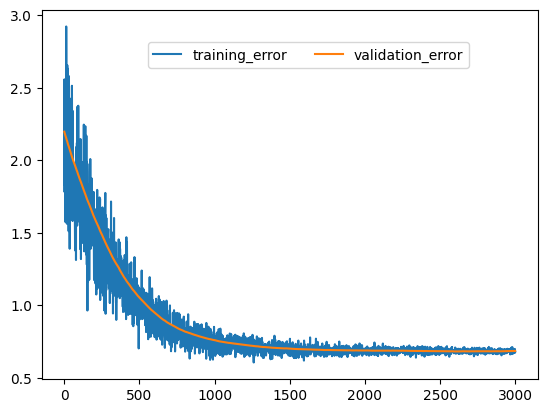

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.01
epoch = 3000
batch_size = 50

# Define the sigmoid function.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the custom logistic regression model's prediction function.
def myModelFunction(X, w):
    return sigmoid(np.dot(X, w))

# Define the custom loss function for logistic regression.
def myLossFunction(X, w, y):
    y_pred = myModelFunction(X, w)
    return -np.mean(y.reshape(-1, 1) * np.log(y_pred) + (1 - y.reshape(-1, 1)) * np.log(1 - y_pred))

# Define a custom training loop for the logistic regression model.
def myTrainingLoop(train_data, train_target, valid_data, valid_target, learning_rate, epoch, batch_size):
    train_losses = np.zeros((epoch, 1))
    valid_losses = np.zeros((epoch, 1))
    w = np.random.normal(0, 1, (train_data.shape[1], 1))

    for i in range(epoch):
        # Randomly sample batch indices without replacement.
        batch_indices = np.random.choice(train_data.shape[0], batch_size, replace=False)
        batch_data = train_data[batch_indices]
        batch_target = train_target[batch_indices]

        y_pred = myModelFunction(batch_data, w)

        gradient = np.dot(batch_data.T, y_pred - batch_target) / batch_data.shape[0]

        w = w - learning_rate * gradient.mean(axis=1, keepdims=True)

        train_losses[i] = myLossFunction(batch_data, w, batch_target)
        valid_losses[i] = myLossFunction(valid_data, w, valid_target)

    return w, train_losses, valid_losses

w, train_losses, valid_losses = myTrainingLoop(train_data, train_target, valid_data, valid_target, learning_rate, epoch, batch_size)

# Plot the training and validation loss.
plt.plot(np.arange(epoch), train_losses, label="training_error")
plt.plot(np.arange(epoch), valid_losses, label="validation_error")
plt.legend(bbox_to_anchor=(0.2, 0.93), ncol=2)
print()

# Calculate and print the training, validation, and testing loss using custom logistic regression model.
print("training loss: %.2f" % (myLossFunction(train_data, w, train_target)))
print("validation loss: %.2f" % (myLossFunction(valid_data, w, valid_target)))
print("testing loss: %.2f" % (myLossFunction(test_data, w, test_target)))
print()

# Print the coefficients and intercept of the scikit-learn logistic regression model.
print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)
print()
